In [ ]:
!nvidia-smi

Tue Jun 13 00:14:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-13 00:14:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-13 00:14:56 (115 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import *
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
import os
from sklearn.metrics import *

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data('101_food_classes_10_percent.zip')

--2023-06-13 00:15:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.128, 64.233.183.128, 173.194.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   107MB/s    in 18s     

2023-06-13 00:15:18 (85.2 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
dir_path = '101_food_classes_10_percent'
train_dir_path = dir_path + '/train'
test_dir_path = dir_path + '/test'

In [ ]:
walk_through_dir(dir_path)

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/strawberry_shortcake'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/hummus'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/dumplings'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/cup_cakes'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/spring_rolls'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/spaghetti_carbonara'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/fish_and_chips'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/club_sandwich'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/onion_rings'.
There are 0 directories and

In [ ]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
INPUT_SHAPE = IMG_SIZE + (3,)

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir_path,
                                                                 label_mode='categorical',
                                                                 image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir_path,
                                                                label_mode='categorical',
                                                                image_size = IMG_SIZE,
                                                                shuffle = False)


Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
checkpoint_path = '101_classes_10_percent_data_model_checkpoint'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only = True,
                                                         monitor = 'val_accuracy',
                                                         save_best_only = True)

In [ ]:
data_augmentation_layer = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
], name = 'data_augmentation_layer')

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
inputs =  tf.keras.layers.Input(shape=INPUT_SHAPE, name= 'input_layer')
x = data_augmentation_layer(inputs, training = True)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_avg_pooling_2d_layer')(x)
outputs = tf.keras.layers.Dense(len(train_data.class_names),
                                activation = 'softmax',
                                name = 'output_layer')(x)
model =  tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, None, None, 3)    0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_2d_layer  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [ ]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer =  tf.keras.optimizers.Adam(learning_rate=0.003),
              metrics = ['accuracy'])
model_history_1 = model.fit(train_data,
          epochs = 5,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = int(0.25 * len(test_data)),
          callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 169s 643ms/step - loss: 2.7915 - accuracy: 0.3434 - val_loss: 2.1766 - val_accuracy: 0.4451
Epoch 2/5
237/237 [==============================] - 142s 598ms/step - loss: 1.7082 - accuracy: 0.5663 - val_loss: 2.0206 - val_accuracy: 0.4772
Epoch 3/5
237/237 [==============================] - 131s 553ms/step - loss: 1.3762 - accuracy: 0.6358 - val_loss: 1.9919 - val_accuracy: 0.4860
Epoch 4/5
237/237 [==============================] - 96s 404ms/step - loss: 1.1765 - accuracy: 0.6821 - val_loss: 1.9977 - val_accuracy: 0.4883
Epoch 5/5
237/237 [==============================] - 88s 367ms/step - loss: 1.0120 - accuracy: 0.7324 - val_loss: 2.0215 - val_accuracy: 0.4795


In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 133s 168ms/step - loss: 1.7856 - accuracy: 0.5411


[1.7855926752090454, 0.5410693287849426]

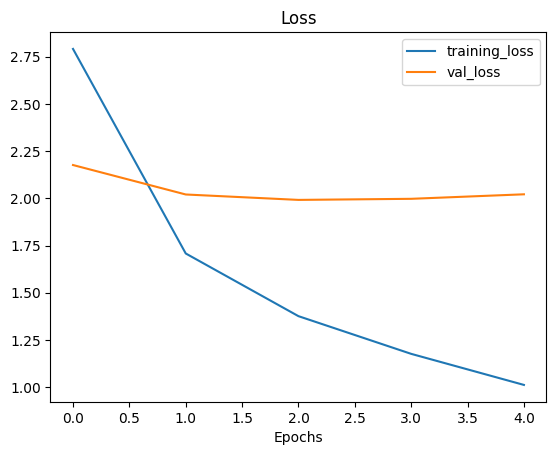

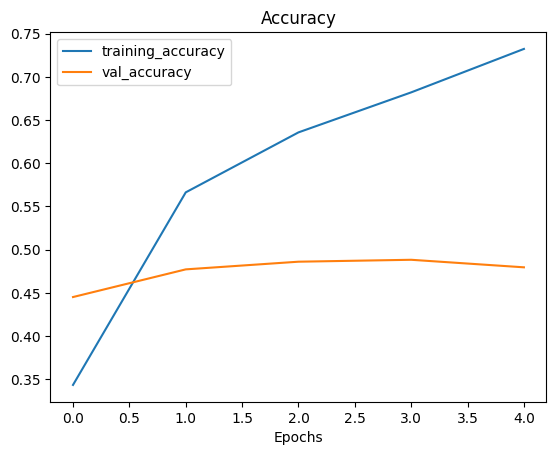

In [ ]:
plot_loss_curves(model_history_1)

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-5]:
  layer.trainable =  False
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5

In [ ]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer =  tf.keras.optimizers.Adam(learning_rate = 0.00003),
              metrics = ['accuracy'])
model_history_2 = model.fit(train_data,
          epochs = fine_tune_epochs,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = int(0.25 * len(test_data)),
          initial_epoch = model_history_1.epoch[-1])

Epoch 5/10
237/237 [==============================] - 73s 264ms/step - loss: 0.7374 - accuracy: 0.8136 - val_loss: 2.0084 - val_accuracy: 0.5022
Epoch 6/10
237/237 [==============================] - 76s 319ms/step - loss: 0.6676 - accuracy: 0.8226 - val_loss: 2.0096 - val_accuracy: 0.5038
Epoch 7/10
237/237 [==============================] - 72s 304ms/step - loss: 0.6485 - accuracy: 0.8256 - val_loss: 2.0236 - val_accuracy: 0.5073
Epoch 8/10
237/237 [==============================] - 62s 260ms/step - loss: 0.6332 - accuracy: 0.8302 - val_loss: 2.0251 - val_accuracy: 0.5062
Epoch 9/10
237/237 [==============================] - 63s 257ms/step - loss: 0.6102 - accuracy: 0.8364 - val_loss: 2.0180 - val_accuracy: 0.5106
Epoch 10/10
237/237 [==============================] - 49s 204ms/step - loss: 0.5689 - accuracy: 0.8495 - val_loss: 2.0222 - val_accuracy: 0.5103


In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 101s 128ms/step - loss: 1.7573 - accuracy: 0.5680


[1.757305383682251, 0.56803959608078]

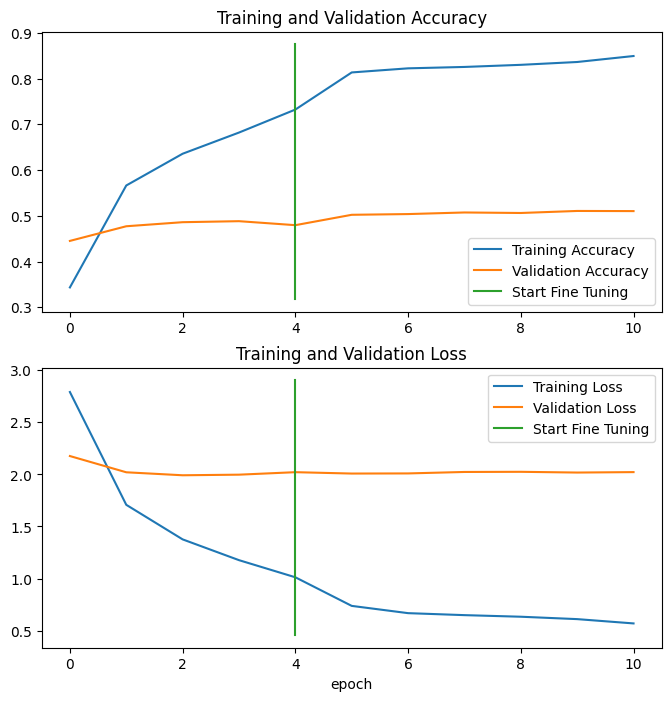

In [ ]:
compare_historys(model_history_1, model_history_2)

In [ ]:
pred_probs = model.predict(test_data, verbose = 1)

790/790 [==============================] - 100s 123ms/step


In [ ]:
print(len(pred_probs[0]))
print(tf.argmax(pred_probs[0]))
print(test_data.class_names[tf.argmax(pred_probs[0])])

101
tf.Tensor(49, shape=(), dtype=int64)
grilled_cheese_sandwich


In [ ]:
pred_classes = pred_probs.argmax(axis = 1)
pred_classes[:10]
len(pred_classes)

25250

In [ ]:
y_labels = []
for images,labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
acc_score = accuracy_score(y_true = y_labels,
                           y_pred = pred_classes)

In [ ]:
make_confusion_matrix(y_labels, pred_classes, test_data.class_names, (100,100), 20)

In [ ]:
classification_report(y_labels, pred_classes)

In [ ]:
classsification_report_dict = classification_report(y_labels, pred_classes, output_dict = True)

In [ ]:
f1_scores = {}
for key, value in classisification_report_dict.items():
  if k == 'accuracy':
    break
  else:
    f1_scores[class_names[int(key)]] = value['f1-score']

In [ ]:
f1_scores = pd.DataFrame({'class_names': list(class_f1_scores.keys()),
                          'f1-score' : list(f1_scores.values())}).sort_values('f1-score', ascending = False)

In [ ]:
fig, ax = plt.subplots(figsize = (12,25))
scores = ax.barh(range(len(f1_scores)), f1_scores['f1-scores'].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores['class_names'])
ax.set_xlabel('F1-score')
ax.set_ylabel('Food Classes')
ax.set_title('F1-scores for 101 different food classes')
ax.invert_yaxis()

In [ ]:
def load_anad_prep_image(filename, img_shape = 224, scale = True):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img, channels = 3)
  img = tf.image.resize(img, size = [img_Shape, img_shape])
  if scale:
    return img/255.
  else:
    return img

In [ ]:
plt.figure(figsize = (17,10))
for i in range(3):
  class_name = random.choice(class_names)
  filename =  random.choice(os.listdir(test_dir_path + '/' + class_name))
  filepath = test_dir + class_name + '/' + filename
  img = load_and_prep_image(filepath, scale = False)
  pred_prob = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[pred_preb.argmax()]
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = 'green'
  else:
    title_color = 'red'
  plt.title(f'Actual: {class_name} Predicted: {pred_class} Probability: {pred_prob.max():.2f}', c = title_color)
  plt.axis(False)

In [ ]:
filepaths = []
for filepath in test_data.list_files('/101_food_classes_10_percent/test/*/*.jpg',
                                     shuffle = False):
  filepaths.append(filepath.numpy())

In [ ]:
pred_df = pd.DataFrame({
    'img_path' : filepaths,
    'y_true' : y_labels,
    'y_pred' : pred_classes,
    'pred_conf' : pred_prob.max(axis=1),
    'y_true_classname' : [class_names[i] for i in y_labels],
    'y_pred_classname' : [class_names[i] for i in pred_classes]
})

pred_df

In [ ]:
pred_df['pred_correct'] = pred_df['y_true'] == pred_df['y_pred']
pred_df.head()

In [ ]:
top_100_wrong = pred_df[pred_df['pred_correct'] == False].sort_values('pred_conf', ascending = False)[:100]
top_100_wrong.head(10)

In [ ]:
images_to_view = 9
start_index = 0
plt.figure(figsize = (15,10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3,3,i+1)
  img = load_and_pred_image(row[1], scale = False)
  _, _, _, _, pred_conf, y_true_classname, y_pred_classname, _ = row
  plt.imshow(img/255.)
  plt.title(f'Actual : {y_true_classname}, Pred : {y_pred_classname}\nProbability : {pred_prob}')
  plt.axis(False)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
unzip_data('custom_food_images.zip')

In [ ]:
custom_food_images = ['custom_food_images/' + img_path for img_path in os.listdr('custom_food_images')]
for img in custom_food_images:
  img = load_and_pred_image(img, scale = True)
  pred_prob = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[pred_prob.argmax()]
  plt.figure()
  plt.imshow(img/255.)
  plt.title(f'Pred : {pred_class}, Probability : {pred_prob.max():.2f}')
  plt.axis(False)